
# Train YOLOv8 Classification on Your Custom Dataset


## Steps

In this noteboook, we are going to cover:

- Before we start
- Install YOLOv8
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Export Model
- Download Model



## Before we start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Runtime` -> `Change Runtime Type`, set it to `GPU`, and then click `Save`.


In [1]:
!nvidia-smi

Wed Apr 23 08:03:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8
There are two ways to install YOLOv8
- From the source (for development)
- Via pip (recommended)

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

To prepare the custom data for classification using YOLO v8, we used a dataset following this structure


### Dataset Structure
```
Dataset
│
└───train
│   └───Plastic
│       │   Plastic_1.jpg
│       │   Plastic_2.jpg
│       │   ...
│   └───Paper
│       │   Paper_1.jpg
│       │   Paper_2.jpg
│       │   ...
│   └───...
└───test
│   └───Plastic
│       │   Plastic_9090.jpg
│       │   Plastic_9895.jpg
│       │   ...
│   └───Paper
│       │   Paper_2343.jpg
│       │   Paper_2312.jpg
│       │   ...
│   └───...
└───val
│   └───Plastic
│       │   Plastic_3070.jpg
│       │   Plastic_2845.jpg
│       │   ...
│   └───Paper
│       │   Paper_2903.jpg
│       │   Paper_2232.jpg
│       │   ...
│   └───...
```


In [5]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

### Download the  Dataset


We upload the dataa.zip file that we prepared and the unzip it into the datasets folder



In [6]:
!unzip "dataa.zip" -d "datasets"

Archive:  dataa.zip
   creating: datasets/dataa/
   creating: datasets/dataa/test/
   creating: datasets/dataa/test/paper/
  inflating: datasets/dataa/test/paper/paper101.jpg  
  inflating: datasets/dataa/test/paper/paper1038.jpg  
  inflating: datasets/dataa/test/paper/paper104.jpg  
  inflating: datasets/dataa/test/paper/paper1044.jpg  
  inflating: datasets/dataa/test/paper/paper1047.jpg  
  inflating: datasets/dataa/test/paper/paper108.jpg  
  inflating: datasets/dataa/test/paper/paper111.jpg  
  inflating: datasets/dataa/test/paper/paper117.jpg  
  inflating: datasets/dataa/test/paper/paper119.jpg  
  inflating: datasets/dataa/test/paper/paper125.jpg  
  inflating: datasets/dataa/test/paper/paper126.jpg  
  inflating: datasets/dataa/test/paper/paper138.jpg  
  inflating: datasets/dataa/test/paper/paper142.jpg  
  inflating: datasets/dataa/test/paper/paper146.jpg  
  inflating: datasets/dataa/test/paper/paper147.jpg  
  inflating: datasets/dataa/test/paper/paper168.jpg  
  inflatin

After unziping we move the train,test,val out of the dataa folder and directly into the datasets folder and delete the empty dataa folder after


## Custom Training

In [7]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8m-cls.pt data='{DATA_DIR}' epochs=10 imgsz=128

/content
100% 32.7M/32.7M [00:00<00:00, 43.3MB/s]
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/datasets, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

## Validate Custom Model

In [8]:
%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train/weights/best.pt data='{DATA_DIR}'

/content
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs
train: /content/datasets/train... found 1532 images in 2 classes ✅ 
val: /content/datasets/val... found 191 images in 2 classes ✅ 
test: /content/datasets/test... found 192 images in 2 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 579.0±396.9 MB/s, size: 9.8 KB)
val: Scanning /content/datasets/val... 191 images, 0 corrupt: 100% 191/191 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100% 12/12 [00:00<00:00, 17.71it/s]
                   all      0.984          1
Speed: 0.0ms preprocess, 2.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
💡 Learn more at https://docs.ultralytics.com/modes/val


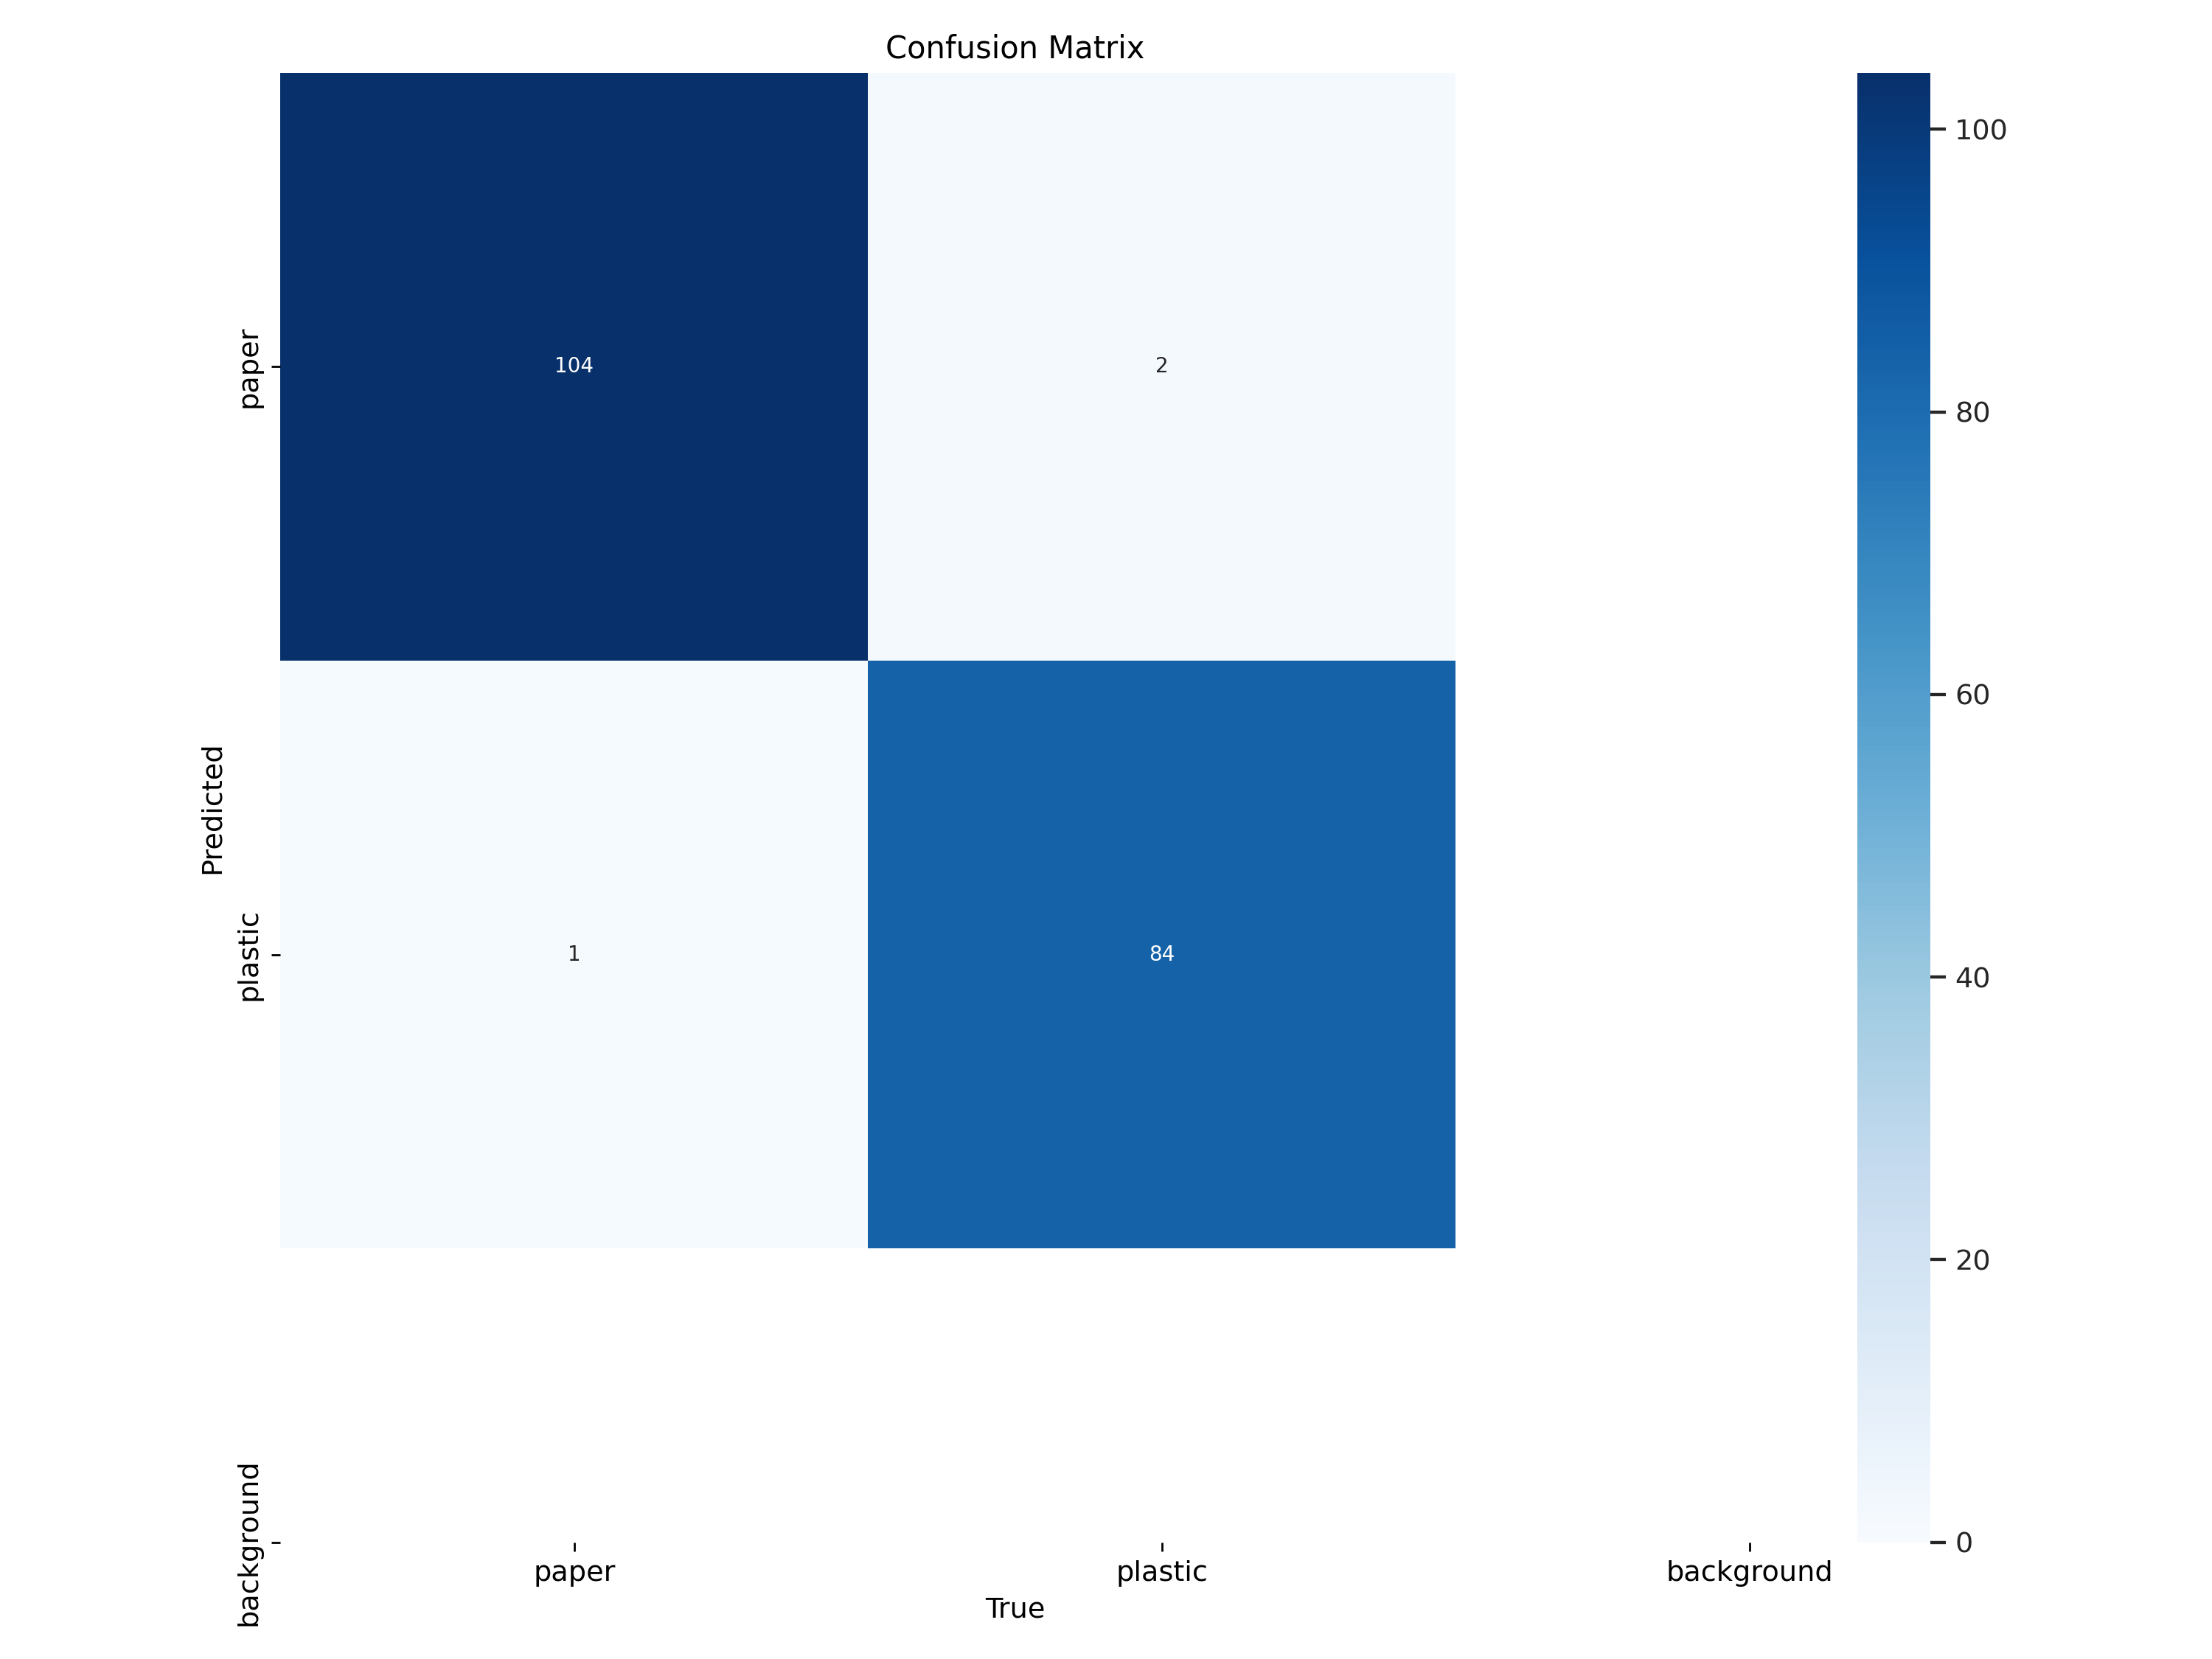

In [9]:
Image(filename=f'{HOME}/runs/classify/val/confusion_matrix.png')

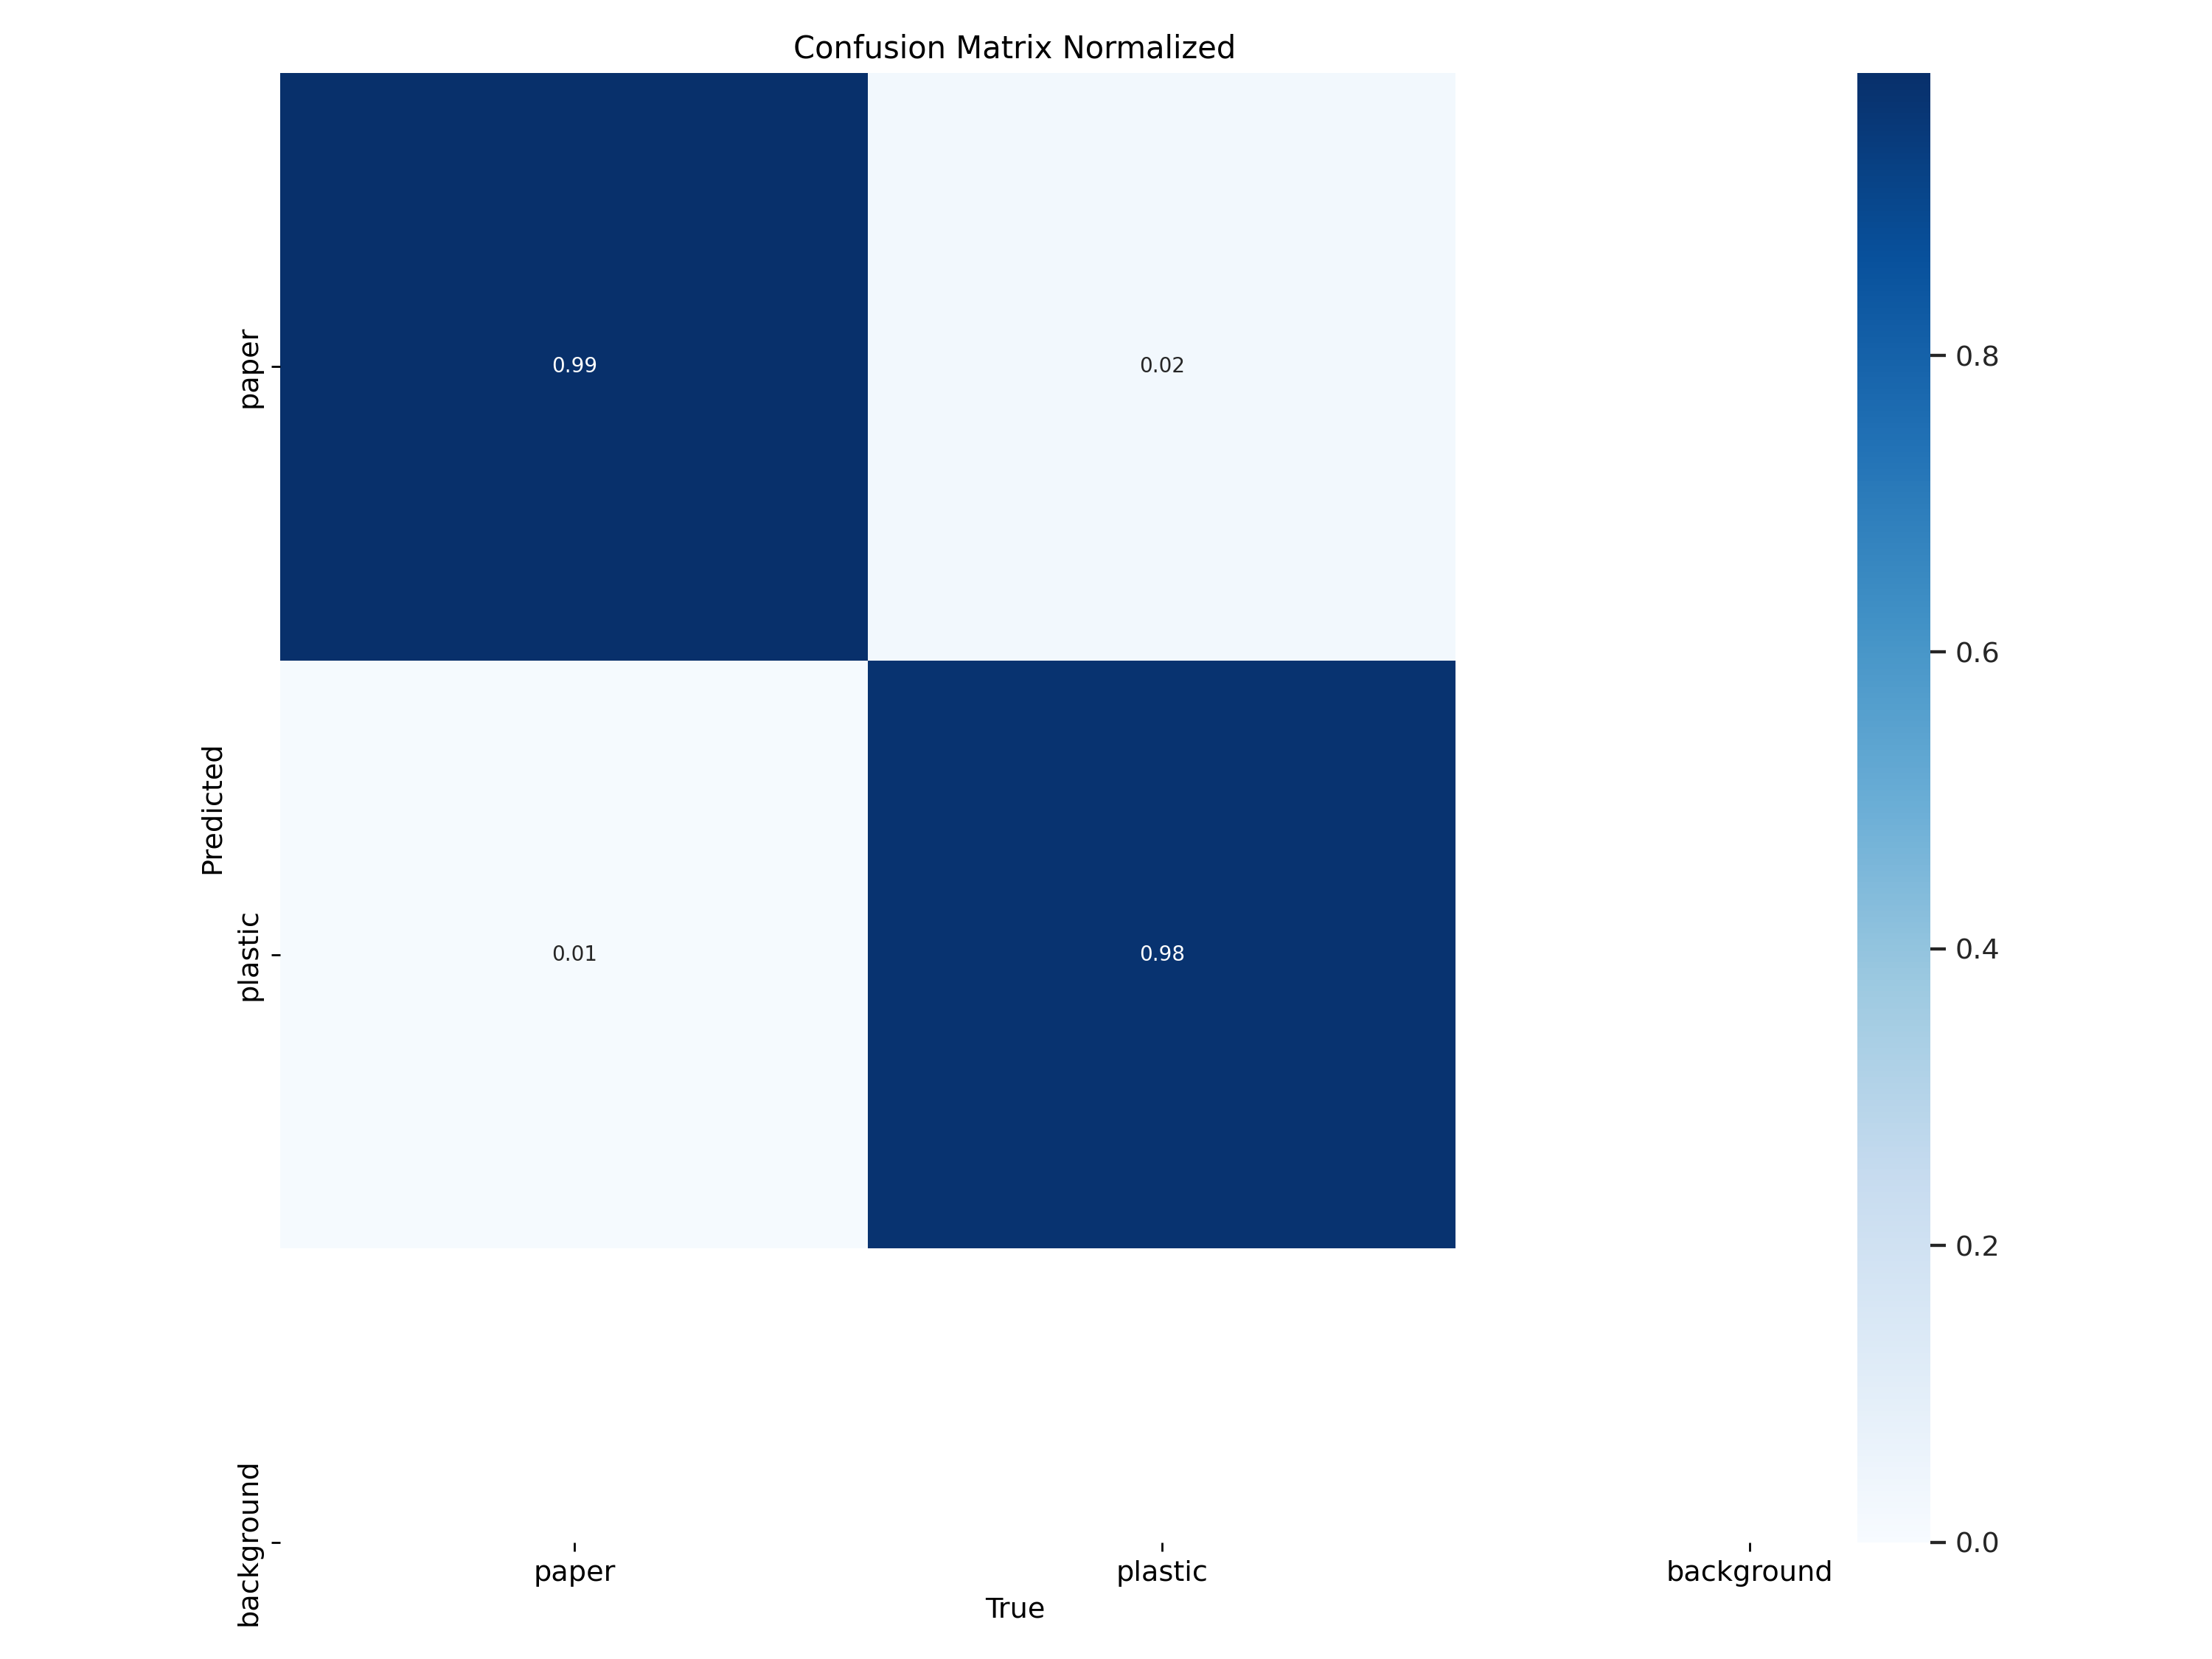

In [10]:
Image(filename=f'{HOME}/runs/classify/val/confusion_matrix_normalized.png')

## Inference with Custom Model

In [11]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source="{DATA_DIR}/test/plastic"

/content
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs

image 1/87 /content/datasets/test/plastic/plastic104.jpg: 128x128 plastic 1.00, paper 0.00, 10.6ms
image 2/87 /content/datasets/test/plastic/plastic121.jpg: 128x128 plastic 1.00, paper 0.00, 6.7ms
image 3/87 /content/datasets/test/plastic/plastic123.jpg: 128x128 plastic 1.00, paper 0.00, 5.9ms
image 4/87 /content/datasets/test/plastic/plastic126.jpg: 128x128 plastic 1.00, paper 0.00, 5.8ms
image 5/87 /content/datasets/test/plastic/plastic128.jpg: 128x128 plastic 1.00, paper 0.00, 5.8ms
image 6/87 /content/datasets/test/plastic/plastic139.jpg: 128x128 plastic 1.00, paper 0.00, 8.3ms
image 7/87 /content/datasets/test/plastic/plastic140.jpg: 128x128 plastic 1.00, paper 0.00, 5.9ms
image 8/87 /content/datasets/test/plastic/plastic163.jpg: 128x128 plastic 1.00, paper 0.00, 7.3ms
image 9/87 /content/datasets/test/

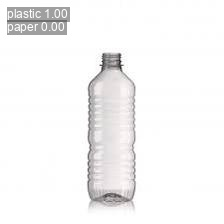

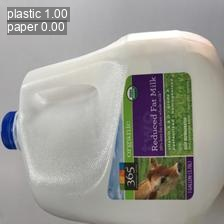

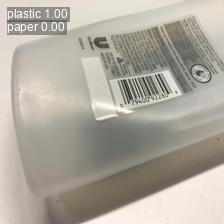

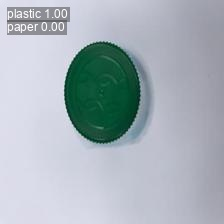

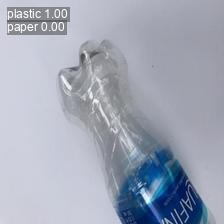

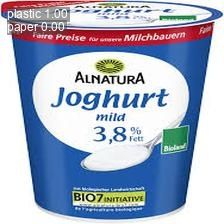

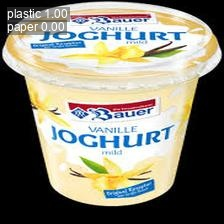

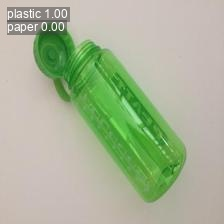

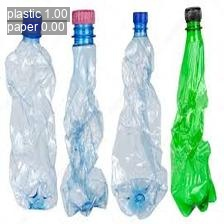

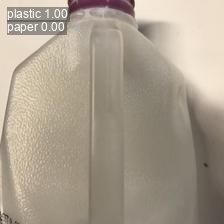

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Export Model

Now we export our model we can use different format for different use case but we win with pytorch form


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [13]:
!yolo export model={HOME}/runs/classify/train/weights/best.pt

WARNING ⚠️ 'format' argument is missing. Using default 'format=torchscript'.
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv8m-cls summary (fused): 42 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs

PyTorch: starting from '/content/runs/classify/train/weights/best.pt' with input shape (1, 3, 128, 128) BCHW and output shape(s) (1, 2) (30.2 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 0.9s, saved as '/content/runs/classify/train/weights/best.torchscript' (60.3 MB)

Export complete (2.7s)
Results saved to /content/runs/classify/train/weights
Predict:         yolo predict task=classify model=/content/runs/classify/train/weights/best.torchscript imgsz=128  
Validate:        yolo val task=classify model=/content/runs/classify/train/weights/best.torchscript imgsz=128 data=/content/datasets  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


### Download Model

In [ ]:
from google.colab import files
files.download('/content/runs/classify/train/weights/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>